In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

# Comparison between feature importances measured on different models

#### Notebook Summary

Models included in this notebook (so far): 
- Coefficients of logistic regression with PCs
- Coefficients of logistic regression without PCs
- Feature importance scores of logistic regression with pr-auc
- Feature importance scores of logistic regression with roc-auc
- Feature importance scores of support vector machine with roc-auc
- Feature importance scores of random forest with roc-auc

In [64]:
lr_pc_df = pd.read_csv("./data/lr/lr_betas_and_scores.csv", index_col=0)
lr_pc_df.head()

,Beta,Score
occ_total_sum,0.350199,0.050025
oldest_phylostratum,-0.224863,0.029586
PC 1,0.024099,0.003402
PC 2,-0.019979,-0.001265
PC 3,-0.077844,0.001851


In [65]:
lr_betas_df = pd.read_csv("./data/lr/lr_betas_no_pca.csv", index_col=0)
lr_betas_df.head()

,beta
occ_total_sum,0.350232
oldest_phylostratum,-0.224689
cds_length,0.131934
dnase_gene,0.070907
dnase_cds,0.026171


In [66]:
lr_roc_scores_df = pd.read_csv("./data/lr/lr_scores.csv", index_col=0)
lr_roc_scores_df.head()

,LR PCA 95% EV,LR PCA 100% EV,LR NO PCA
occ_total_sum,0.053708,0.043968,0.043038
oldest_phylostratum,0.025889,0.019536,0.021201
cds_length,0.008424,0.010147,0.008041
dnase_gene,-0.000020,0.005935,-0.000186
dnase_cds,0.001670,0.000044,-0.000966


In [67]:
lr_pr_scores_df = pd.read_csv("./data/lr/lr_scores_prauc.csv", index_col=0)
lr_pr_scores_df.head()

,LR PCA 95% EV,LR PCA 100% EV,LR NO PCA
occ_total_sum,0.089598,0.079362,0.089500
oldest_phylostratum,0.017028,0.018461,0.016649
cds_length,0.012679,0.016039,0.015578
dnase_gene,-0.000454,0.007789,-0.000231
dnase_cds,0.000706,0.000046,-0.000862


In [68]:
rf_roc_scores_df = pd.read_csv("./data/rf/rf_fi_roc_auc_scores.csv", index_col=0)
rf_roc_scores_df.head()

,RF PCA 95%,RF PCA 100%,RF no PCA
occ_total_sum,0.039330,0.022899,0.019979
oldest_phylostratum,0.019345,0.017733,0.009374
cds_length,0.004949,-0.002096,0.010664
dnase_gene,0.000183,0.000405,0.000370
dnase_cds,-0.000678,0.000842,0.000298


In [127]:
svm_roc_scores_df = pd.read_csv("./data/svm/svm_fi_roc_auc_scores.csv", index_col=0)
svm_roc_scores_df.head()

,SVM PCA 95%,SVM PCA 100%,SVM no PCA
occ_total_sum,0.025759,0.024461,0.018777
oldest_phylostratum,0.008204,0.007452,0.007427
cds_length,0.006737,0.004759,0.004870
dnase_gene,0.001192,0.001843,0.002267
dnase_cds,0.001055,-0.000065,0.001036


## Analysis Function

In [128]:
from scipy.stats import spearmanr

def correlate_scores(score_A, score_B):
    sns.scatterplot(x=score_A, y=score_B)
    plt.show()
    print(spearmanr(score_A, score_B))

## Betas vs Importance Score of PCs

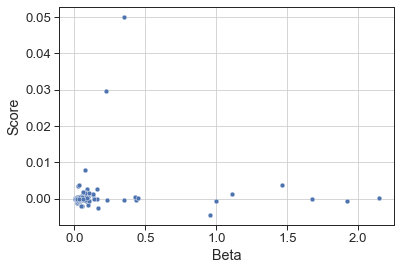

SpearmanrResult(correlation=0.12243009980300606, pvalue=0.27318379726748904)


In [156]:
correlate_scores(abs(lr_pc_df["Beta"]), lr_pc_df["Score"])

## Betas vs Importance Scores of Features

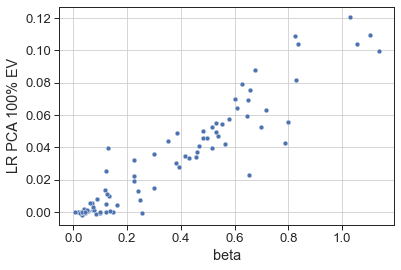

SpearmanrResult(correlation=0.9139103840837605, pvalue=4.591877688228741e-33)


In [157]:
correlate_scores(abs(lr_betas_df["beta"]), lr_roc_scores_df["LR PCA 100% EV"])

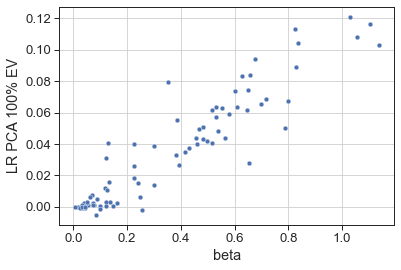

SpearmanrResult(correlation=0.9117771900610572, pvalue=1.1716760468191826e-32)


In [158]:
correlate_scores(abs(lr_betas_df["beta"]), lr_pr_scores_df["LR PCA 100% EV"])

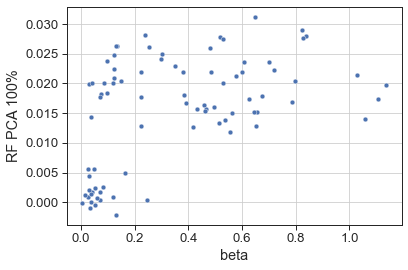

SpearmanrResult(correlation=0.47804225030202113, pvalue=5.573062953880228e-06)


In [159]:
correlate_scores(abs(lr_betas_df["beta"]), rf_roc_scores_df["RF PCA 100%"])

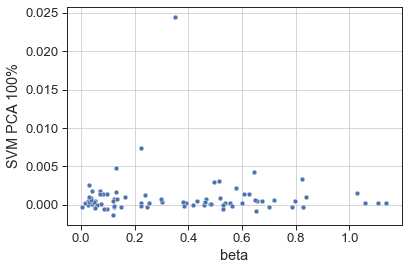

SpearmanrResult(correlation=-0.019362000848924154, pvalue=0.8629227155648671)


In [160]:
correlate_scores(abs(lr_betas_df["beta"]), svm_roc_scores_df["SVM PCA 100%"])

## Importance Scores between Logistic Regression and Random Forest

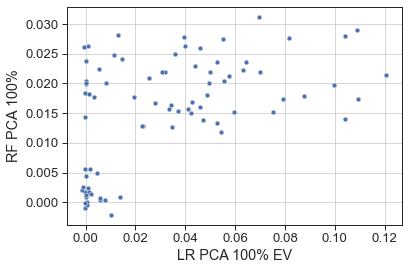

SpearmanrResult(correlation=0.422056790849033, pvalue=7.834339091109788e-05)


In [134]:
correlate_scores(lr_roc_scores_df["LR PCA 100% EV"], rf_roc_scores_df["RF PCA 100%"])

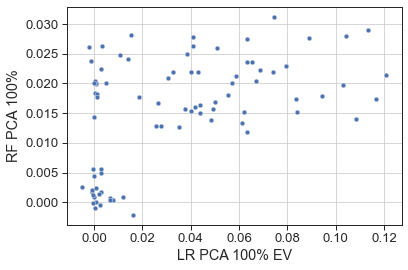

SpearmanrResult(correlation=0.4255613238863313, pvalue=6.728231358227255e-05)


In [135]:
correlate_scores(lr_pr_scores_df["LR PCA 100% EV"], rf_roc_scores_df["RF PCA 100%"])

## LR and SVM

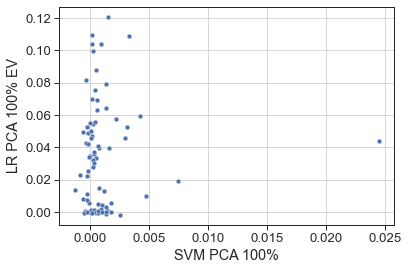

SpearmanrResult(correlation=0.04781184358028319, pvalue=0.6697056229397953)


In [136]:
correlate_scores(svm_roc_scores_df["SVM PCA 100%"], lr_roc_scores_df["LR PCA 100% EV"])

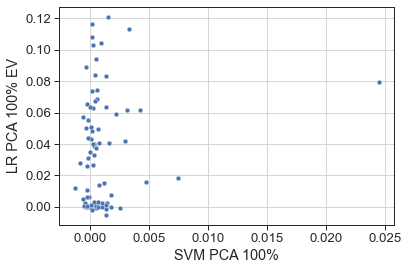

SpearmanrResult(correlation=0.035491559734874466, pvalue=0.7515808727026687)


In [137]:
correlate_scores(svm_roc_scores_df["SVM PCA 100%"], lr_pr_scores_df["LR PCA 100% EV"])

## RF and SVM

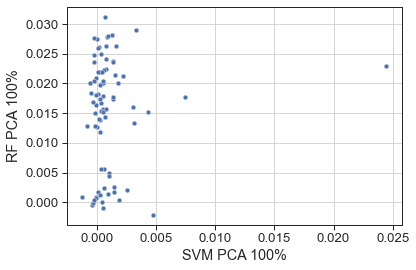

SpearmanrResult(correlation=0.09809427411543192, pvalue=0.38061607728740454)


In [138]:
correlate_scores(svm_roc_scores_df["SVM PCA 100%"], rf_roc_scores_df["RF PCA 100%"])

In [139]:
print(svm_roc_scores_df["SVM PCA 100%"].idxmax() , svm_roc_scores_df["SVM PCA 100%"].max())

occ_total_sum 0.0244610803978856


## Between LR Feature Importances calculated with two different metrics

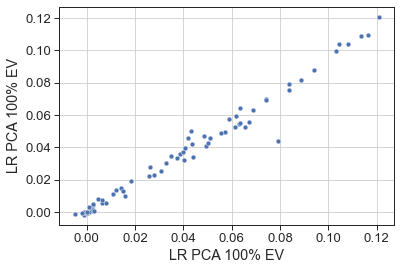

SpearmanrResult(correlation=0.9843275541189147, pvalue=4.631632874719389e-62)


In [140]:
correlate_scores(lr_pr_scores_df["LR PCA 100% EV"], lr_roc_scores_df["LR PCA 100% EV"])

## Highest scoring features?

In [155]:
print("LR (PC betas): ", lr_pc_df["Beta"].idxmax() , lr_pc_df["Beta"].max())
print("LR (PC Scores):", lr_pc_df["Score"].idxmax() , lr_pc_df["Score"].max())
print()
print("LR (Betas):    ", lr_betas_df["beta"].idxmax() , lr_betas_df["beta"].max())
print("LR (ROC-AUC):  ", lr_roc_scores_df["LR PCA 100% EV"].idxmax() , lr_roc_scores_df["LR PCA 100% EV"].max())
print("LR (PR-AUC):   ", lr_pr_scores_df["LR PCA 100% EV"].idxmax() , lr_pr_scores_df["LR PCA 100% EV"].max())
print()
print("RF:            ", rf_roc_scores_df["RF PCA 100%"].idxmax() , rf_roc_scores_df["RF PCA 100%"].max())
print()
print("SVM:           ", svm_roc_scores_df["SVM PCA 100%"].idxmax() , svm_roc_scores_df["SVM PCA 100%"].max())

LR (PC betas):  PC 79 2.1457193996865214
LR (PC Scores): occ_total_sum 0.0500252676264539

LR (Betas):     TAT_freq 1.1371116085444706
LR (ROC-AUC):   ATA_freq 0.1207071769208205
LR (PR-AUC):    ATA_freq 0.1209728174410954

RF:             TAA_freq 0.0312120050940205

SVM:            occ_total_sum 0.0244610803978856
